In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

### Giải thích `patch.force_edgecolor = True`

#### 🔹 Giới thiệu
Dòng lệnh sau trong **Matplotlib** được dùng để đảm bảo rằng tất cả các hình dạng (**patches**) có viền xung quanh:

```python
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

### Every variable has a distribution

In [4]:
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies.show(6)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956


In [5]:
studio_distribution = top_movies.group('Studio')

In [6]:
studio_distribution.show(6)

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24


### Visualizing distributions

#### **Task:** Visualize the distribution of studios responsible for the highest grossing movies as of 2017.

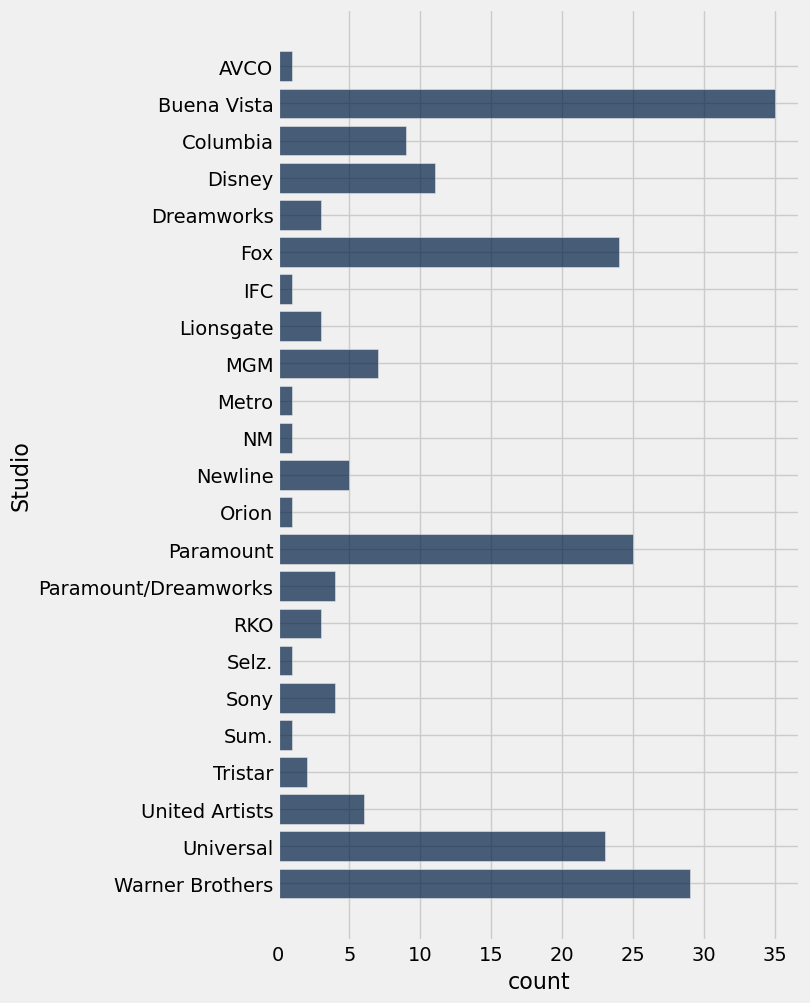

In [7]:
studio_distribution.barh('Studio')

Five studios are largely responsible for the highest grossing movies


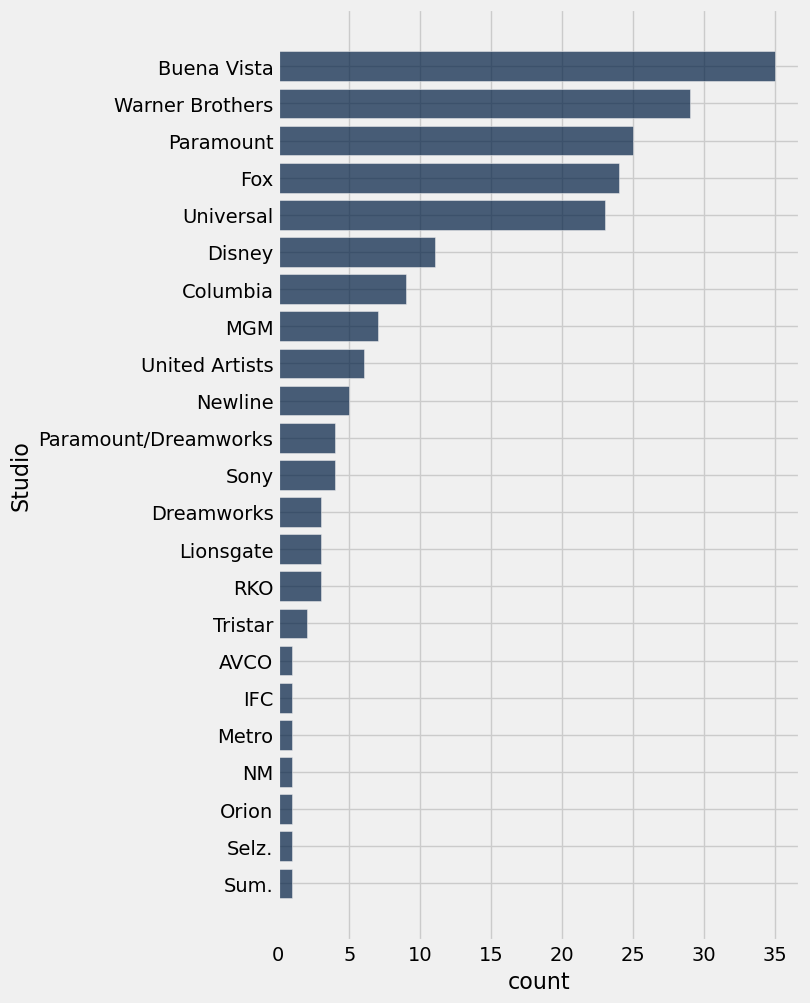

In [8]:
studio_distribution.sort('count', descending=True).barh('Studio')
print("Five studios are largely responsible for the highest grossing movies")

### Use binning for numerical distributions

#### **Task**: Visualize the distribution of how long the highest grossing movies as of 2017 have been out (in years).

In [9]:
ages = 2022 - top_movies.column('Year')

In [10]:
top_movies = top_movies.with_column('Age', ages)

In [11]:
top_movies.select('Title', 'Age').show(6)

Title,Age
Gone with the Wind,83
Star Wars,45
The Sound of Music,57
E.T.: The Extra-Terrestrial,40
Titanic,25
The Ten Commandments,66


In [12]:
min(ages), max(ages)

(5, 101)

- If you want to make equally sized bins, `np.arange()` is a great tool to help you.

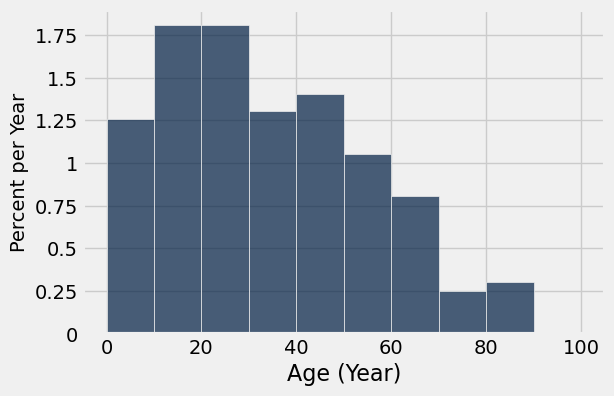

In [13]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

- Otherwise, you can pick your own bins. These are just bins that we picked out.

In [14]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 101)

In [15]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
101,0


**Note:** The last bin does not include any observations!! 
 - This is because $101$ is the right endpoint of the last bin. It is not the beginning of any bin.

### Introducing the histogram

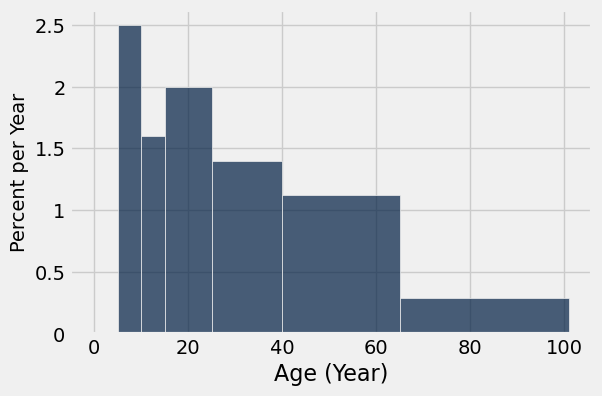

In [16]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

#### **Discussion Question (1 min)**: Compare the bins $[25, 40)$ and $[40, 65)$. 

- Which one has more movies?
- Which one is more crowded?

#### **Task**: Find the height of the $[40,65)$ bin in the histogram above.

$$\text{height} = \frac{\text{percent}}{\text{width}}$$

Add a column containing what percent of movies are in each bin (the **area** of each bin)

In [20]:
# Calculate the total number of observations in the 'Age count' column
total_count = sum(binned_data.column('Age count'))
total_count

200

In [21]:
# Create a new 'Percent' column using the computed total count
binned_data = binned_data.with_column('Percent', 100 * binned_data.column('Age count') / total_count)

In [22]:
binned_data.show(3)

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8


In [23]:
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [24]:
width = 65-40
height = percent / width

In [25]:
height

1.12

#### **Task**: Find the heights of the (rest of the) bins.

$$\text{height} = \frac{\text{percent}}{\text{width}}$$

In [26]:
# height_table
height_table = binned_data.take(np.arange(binned_data.num_rows - 1))
height_table 

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,21,10.5


In [28]:
# bin_widths
bin_widths = np.diff(binned_data.column('bin'))
bin_widths

array([ 5,  5,  5, 10, 15, 25, 36], dtype=int64)

In [29]:
# height_table
height_table = height_table.with_column('Width', bin_widths)
height_table

bin,Age count,Percent,Width
0,0,0,5
5,25,12.5,5
10,16,8,5
15,40,20,10
25,42,21,15
40,56,28,25
65,21,10.5,36


In [30]:
height_table = height_table.with_column('Height',
                                        height_table.column('Percent')/height_table.column('Width'))
height_table

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,25,12.5,5,2.5
10,16,8,5,1.6
15,40,20,10,2
25,42,21,15,1.4
40,56,28,25,1.12
65,21,10.5,36,0.291667


To check our work one last time:

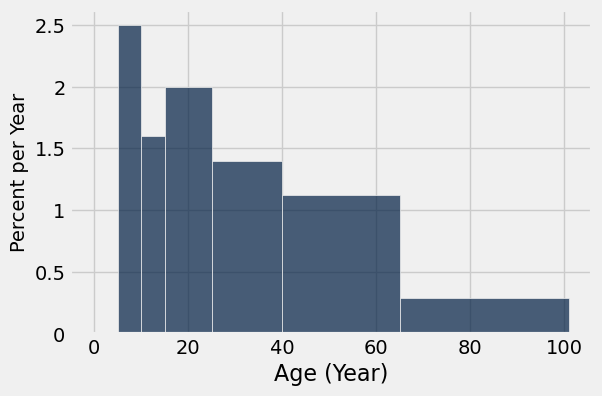

In [31]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

## New material
### Functions

### Create functions with a definition

```python
def functionname(Arguments_Parameters_Expressions_or_Values):  
    """docstring"""
      return return_expression
```

#### **Task:** Create a function that takes a numerical input and triples it.

In [33]:
def triple(x):
    """triples the numerical input"""
    return 3 * x

In [34]:
triple(3)

9

In [35]:
num = 4

In [36]:
triple(num)

12

In [37]:
triple(num * 5)

60

**Note:** Functions are type-agnostic. (Các hàm không phụ thuộc vào kiểu dữ liệu.)

In [38]:
triple(np.arange(4))

array([0, 3, 6, 9])

Hàm np.arange(4) tạo một mảng NumPy gồm các số nguyên từ 0 đến 3 (không bao gồm 4):
    <br> tripple từng thành phần

In [39]:
triple('ha')

'hahaha'

#### **Discussion Question 4:** Can you decipher the function `f`?

- What type of input does `f` take?
- What type of output does `f` produce?
- What's a good name for the function (and what might go in the docstring)?

```python
def f(s):    
    """docstring"""
      return np.round(s / sum(s) * 100, 2)
```

## 🔹 Giải thích hàm `f(s)`

- **Nhận vào**: Mảng số `s`.  
- **Tính tổng**: `sum(s)`.  
- **Chia từng phần tử**: `s / sum(s) * 100`.  
- **Làm tròn**: `np.round(..., 2)`.  
- **Trả về**: Mảng phần trăm của `s`.  


In [42]:
def f(s):
    """docstring"""
    return np.round(s / sum(s) * 100, 2)

In [43]:
first_four=make_array(1,2,3,4)
first_four

array([1, 2, 3, 4], dtype=int64)

In [44]:
f(first_four)

array([ 10.,  20.,  30.,  40.])

In [45]:
f(make_array(1, 213, 38))

array([  0.4 ,  84.52,  15.08])

#### **Task:** Calculate the hypotenuse length (cạnh huyền) of a right triangle (tam giác vuông).

Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

In [50]:
# def hypotenuse(x, y)

In [46]:
def hypotenuse(x, y):
    """finds the hypotenuse of a right triangle with right-angle sides of length x and y"""
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [47]:
hypotenuse(1, 2)

2.23606797749979

In [48]:
hypotenuse(3, 4)

5.0

In [49]:
hypotenuse(9, 12)

15.0

**Discussion Question 5**: We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [51]:
def hypotenuse(x,y):
    """finds the hypotenuse of a right triangle with right-angle sides of length x and y"""
    return (x ** 2 + y ** 2) ** 0.5

#### **Task:** Create a function that takes the year of birth of a person and produces their age in years.
def age(year):

In [53]:
def age(year):
    """returns age in years"""
    age = 2024 - year
    return age

In [54]:
age(1942)

82

#### **Task:** Create a function that:
- takes a person's name and year of birth (two arguments). 
- produces a sentence that states how old they are.<br>
*def name_and_age(name, year):* 

In [55]:
def name_and_age(name, year):
    """returns a sentence stating a person's age in years"""
    return name + ' is ' + str(age(year)) + ' years old.'

In [56]:
name_and_age('Joe', 1942)

'Joe is 82 years old.'

### Use functions on table columns with `apply` 

Phương thức `.apply()` được sử dụng để áp dụng một hàm lên mỗi giá trị trong một cột của bảng (`Table` trong `datascience` hoặc `pandas`).

In [57]:
fam = Table().with_columns(
    'First Name', make_array('Cristina', 'Azalea', 'Farah', 'Izzy', 'Lubo'),
    'Birth Year', make_array(2005, 2004, 2004, 2005, 2004)
)
fam

First Name,Birth Year
Cristina,2005
Azalea,2004
Farah,2004
Izzy,2005
Lubo,2004


In [58]:
make_array(age(fam.column('Birth Year').item(0)),
           age(fam.column('Birth Year').item(1)),
           age(fam.column('Birth Year').item(2)),
           age(fam.column('Birth Year').item(3)),
           age(fam.column('Birth Year').item(4)))

array([19, 20, 20, 19, 20], dtype=int64)

In [59]:
fam.apply(age, 'Birth Year')

array([19, 20, 20, 19, 20], dtype=int64)

In [60]:
fam.apply(name_and_age, 'First Name', 'Birth Year')

array(['Cristina is 19 years old.', 'Azalea is 20 years old.',
       'Farah is 20 years old.', 'Izzy is 19 years old.',
       'Lubo is 20 years old.'],
      dtype='<U25')

#### 🔹 Yêu cầu: Thêm cột `"Statement"` vào bảng `fam`

- Cột `"Statement"` chứa câu mô tả tuổi của từng người.  
- Nội dung được tính từ cột `"First Name"` và `"Birth Year"`, sử dụng hàm `name_and_age`.  
- Kết quả hiển thị tuổi của mỗi người dưới dạng `"Alice is 35 years old."`.  

In [61]:
fam.with_columns("Statement",
                 fam.apply(name_and_age, 'First Name', 'Birth Year'))

First Name,Birth Year,Statement
Cristina,2005,Cristina is 19 years old.
Azalea,2004,Azalea is 20 years old.
Farah,2004,Farah is 20 years old.
Izzy,2005,Izzy is 19 years old.
Lubo,2004,Lubo is 20 years old.


In [62]:
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

#### 🔹 Giải thích `warnings.simplefilter`

- **Mục đích**: Bỏ qua cảnh báo `VisibleDeprecationWarning` của NumPy.  
- **`action='ignore'`**: Bỏ qua cảnh báo thay vì hiển thị nó.  
- **`category=np.VisibleDeprecationWarning`**: Chỉ áp dụng cho cảnh báo này.  

**Khi nào dùng?** Khi NumPy cảnh báo về mảng có kiểu dữ liệu không đồng nhất nhưng không ảnh hưởng đến kết quả.  

## Review

> *Below we load ... 200,000 weekday Uber rides in the ...  Boston, Massachusetts metropolitan area from the [Uber Movement](https://www.uber.com/newsroom/introducing-uber-movement-2/) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride in minutes.*

In [63]:
boston = Table.read_table("data/boston.csv")
boston.show(6)

sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235
218,1189,7,42.5588
1048,461,7,26.4212


**Discussion Question:** I would like to add a column to this dataset giving the ride time in seconds. 

What is a method that makes the most sense:

- If I plan to work with only the `boston` dataset?
- If I plan to work with multiple Uber Movement datasets, such as the `manila` dataset you saw in your homework?

`ride time seconds`

In [64]:
boston.with_columns('ride time seconds', boston.column('ride time')*60)

sourceid,dstid,hod,ride time,ride time seconds
584,33,7,11.866,711.96
1013,1116,13,17.7993,1067.96
884,1190,22,19.3488,1160.93
211,364,1,1.7235,103.41
218,1189,7,42.5588,2553.53
1048,461,7,26.4212,1585.27
879,461,11,23.7743,1426.46
1047,1002,17,36.3583,2181.5
930,856,6,16.6407,998.44
1110,875,22,17.3533,1041.2


Write `mins_to_seconds` function

In [67]:
def mins_to_seconds(times):
    return times*60

Use function to add `ride time seconds`

In [68]:
boston.with_columns('ride time seconds', boston.apply(mins_to_seconds,'ride time'))

sourceid,dstid,hod,ride time,ride time seconds
584,33,7,11.866,711.96
1013,1116,13,17.7993,1067.96
884,1190,22,19.3488,1160.93
211,364,1,1.7235,103.41
218,1189,7,42.5588,2553.53
1048,461,7,26.4212,1585.27
879,461,11,23.7743,1426.46
1047,1002,17,36.3583,2181.5
930,856,6,16.6407,998.44
1110,875,22,17.3533,1041.2


## New material - Grouping
### One-column groups

In [69]:
cones = Table.read_table('data/cones.csv')
cones_without_color = cones.drop('Color') 

In [70]:
cones_without_color

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [71]:
cones_without_color.group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


### Two-column groups

In [72]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [73]:
cones.group(['Flavor', 'Color'],np.average)

Flavor,Color,Price average
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


In [74]:
cones.group(['Flavor', 'Color'], min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


### `nba_salaries` dataset

In [75]:
nba = Table.read_table("data/nba_salaries.csv")
nba.show(6)

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000
4,Juwan Howard,PF,Washington Wizards,15000000,2000
5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
6,Karl Malone,PF,Utah Jazz,14000000,2000


#### **Task**: Find the five teams paying the highest average salary (in millions) in 2010.
- Your results should be in the form of a table with 5 rows and 2 columns:
    - One column should have the team name
    - The other column should have the average salary for that team, in millions.
- Challenge: Try to only use `Table.select()` or `Table.drop()` *once* in your solution. 

In [76]:
nba.where('season',2010).select('team','salary').group('team', np.average)

team,salary average
Atlanta Hawks,4.4734e+06
Boston Celtics,5.71586e+06
Brooklyn Nets,7.1e+06
Charlotte Bobcats,4.44677e+06
Charlotte Hornets,736420
Chicago Bulls,3.47643e+06
Cleveland Cavaliers,5.41492e+06
Dallas Mavericks,7.10886e+06
Denver Nuggets,5.23666e+06
Detroit Pistons,3.92461e+06


In [77]:
def average_in_millions(x):
    """finds the average of a list of numbers and divides by one million"""
    average = np.average(x)
    return average/1e6

In [80]:
salary_table_2020 = nba.where('season', 2020).select('team', 
                                 'salary').group('team', average_in_millions)

In [81]:
salary_table_2020.sort(1, descending=True).show(5)

team,salary average_in_millions
Denver Nuggets,9.75706
Minnesota Timberwolves,9.20566
Portland Trail Blazers,8.69554
Dallas Mavericks,8.42969
Orlando Magic,8.38645


### Advanced grouping
#### `welcome_survey` dataset

In [82]:
survey = Table.read_table('data/welcome_survey_sp24.csv')
underclassmen = make_array('First Year','Second Year', 'Third Year','Fourth Year')
survey = survey.where('Year', are.contained_in(underclassmen))
survey.show(5)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Sleep position,Pets,TV,Piercings
Second Year,7,5,7,Right-handed,On your back,a little brother,Black Mirror,3
Second Year,3,6,7,Right-handed,On your right side,Bird,nan,0
Second Year,3,8,6,Right-handed,On your right side,Bird,The Bear,0
First Year,4,4,7,Right-handed,On your left side,Bird,Gilmore Girls,1
Second Year,3,3,7,Right-handed,On your stomach,Bird,nan,2


**Discussion Question 2**: How many rows and how many columns will the table be that is produced by the following code?

In [83]:
survey.group('Year')

Year,count
First Year,470
Fourth Year,49
Second Year,220
Third Year,191


**Discussion Question 3**: How many rows and how many columns will the table be that is produced by the following code?

In [84]:
survey.group('Year', np.average)

Year,Extraversion average,Number of textees average,Hours of sleep average,Handedness average,Sleep position average,Pets average,TV average,Piercings average
First Year,5.69574,7.58723,7.12872,,,,,1.68936
Fourth Year,5.40816,6.59184,7.09184,,,,,2.08163
Second Year,5.49545,6.59545,6.91591,,,,,2.46818
Third Year,5.12565,5.48691,7.02094,,,,,3.08901


In [85]:
survey.drop('Handedness', 'Sleep position', 'Pets', 'TV').group('Year', np.average)

Year,Extraversion average,Number of textees average,Hours of sleep average,Piercings average
First Year,5.69574,7.58723,7.12872,1.68936
Fourth Year,5.40816,6.59184,7.09184,2.08163
Second Year,5.49545,6.59545,6.91591,2.46818
Third Year,5.12565,5.48691,7.02094,3.08901


#### **Challenge Task (`nba` dataset)** Find the $n$ teams paying the highest average salary (in millions) in season $y$.
- In other words, write code that will produce the table you made above, but for any given $n$ and $y$.

Note that in this solution, we are calling the function `average_in_millions` inside of our `highest_paying_teams` function!!!

In [86]:
def highest_paying_teams(y, n):
    """gives a table of NBA teams with the highest average salary"""
    salary_table = nba.where('season', y).select('team', 
                                 'salary').group('team', average_in_millions)
    return salary_table.sort(1, descending=True).show(n)

In [87]:
highest_paying_teams(2016,3)

team,salary average_in_millions
Cleveland Cavaliers,6.9503
Oklahoma City Thunder,5.70945
Golden State Warriors,5.61352
